In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install transformers

     |████████████████████████████████| 1.8MB 12.8MB/s 
     |████████████████████████████████| 890kB 59.2MB/s 
     |████████████████████████████████| 3.2MB 55.2MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893261 sha256=5e3b9c5024d4242ad617f840011226371281257977b8bf6ec02391a6006a6222
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


In [3]:
from transformers import BertTokenizer
from keras.preprocessing.sequence import pad_sequences
import torch

tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased', do_lower_case=False)

In [20]:
def eval_line(line):
    tokenized = [tokenizer.tokenize(word) for word in line]
    token_ids = [tokenizer.convert_tokens_to_ids(token) for token in tokenized]
    token_ids = pad_sequences(token_ids, maxlen=128, dtype="long", truncating="post", padding="post")
    inputs = torch.tensor(token_ids)
    attention_masks=[]
    for sent in token_ids:
        att_mask = [int(token_id > 0) for token_id in sent]
        attention_masks.append(att_mask)
    masks = torch.tensor(attention_masks)
    b_input_ids = inputs.to(device)
    b_input_mask = masks.to(device)
    
    with torch.no_grad():
        outputs = model(b_input_ids, 
                token_type_ids=None, 
                attention_mask=b_input_mask)
    logits = outputs[0]
    logits = logits.detach().cpu().numpy()
    return logits

In [19]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
def eval(category):
    date_list = ["2019.12", "2020.01", "2020.02", "2020.03", "2020.04", "2020.05", "2020.06", "2020.07", "2020.08", "2020.09", "2020.10", "2020.11", "2020.12", "2021.01"]
    contents = [[] for i in range(len(date_list))]
    for i in range(len(date_list)):
      file = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Sentiment Analysis/data/' + category + '/' + date_list[i] + '.csv')
      for content in file['title']:
          contents[i].append(content)
    sentiments = []
    for content in contents:
        pos = 0
        neg = 0
        for line in content:
            logits = eval_line([line])
            if np.argmax(logits):
                pos+=1
            else:
                neg+=1
        sentiments.append(pos / len(content))
        print(date_list[len(sentiments) - 1] + ' : ' + str(sentiments[len(sentiments) - 1]))
    print("-------------Finished-------------")
    plt.figure(figsize=(15, 8))
    plt.plot(date_list, sentiments)
    plt.title(category)
    plt.show()

In [ ]:
from transformers import BertForSequenceClassification
save_dir = '/content/drive/MyDrive/Colab Notebooks/Sentiment Analysis/saved_model'
model = BertForSequenceClassification.from_pretrained(save_dir)
device = "cuda:0"
model = model.to(device)
model.eval()

2019.12 : 0.602
2020.01 : 0.462
2020.02 : 0.372
2020.03 : 0.488
2020.04 : 0.468
2020.05 : 0.474
2020.06 : 0.412
2020.07 : 0.52
2020.08 : 0.454
2020.09 : 0.632
2020.10 : 0.494
2020.11 : 0.432
2020.12 : 0.55
2021.01 : 0.498
-------------Finished-------------


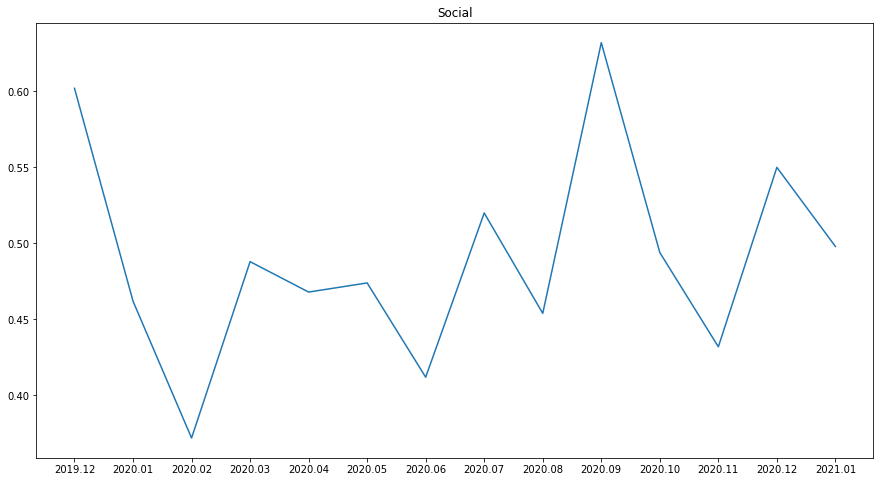

In [21]:
eval('Social')

2019.12 : 0.566
2020.01 : 0.5
2020.02 : 0.41
2020.03 : 0.344
2020.04 : 0.51
2020.05 : 0.474
2020.06 : 0.436
2020.07 : 0.534
2020.08 : 0.464
2020.09 : 0.48
2020.10 : 0.426
2020.11 : 0.492
2020.12 : 0.522
2021.01 : 0.424
-------------Finished-------------


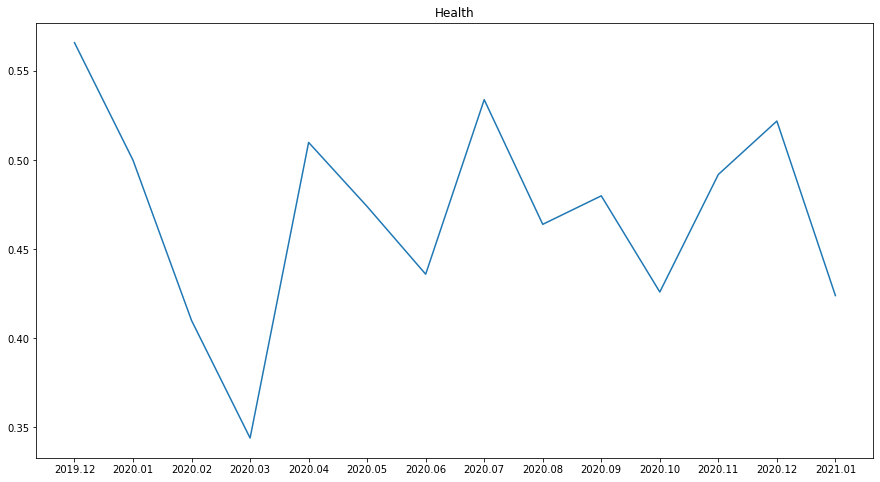

In [22]:
eval('Health')

2019.12 : 0.532
2020.01 : 0.348
2020.02 : 0.272
2020.03 : 0.294
2020.04 : 0.376
2020.05 : 0.366
2020.06 : 0.332
2020.07 : 0.342
2020.08 : 0.356
2020.09 : 0.398
2020.10 : 0.412
2020.11 : 0.384
2020.12 : 0.534
2021.01 : 0.392
-------------Finished-------------


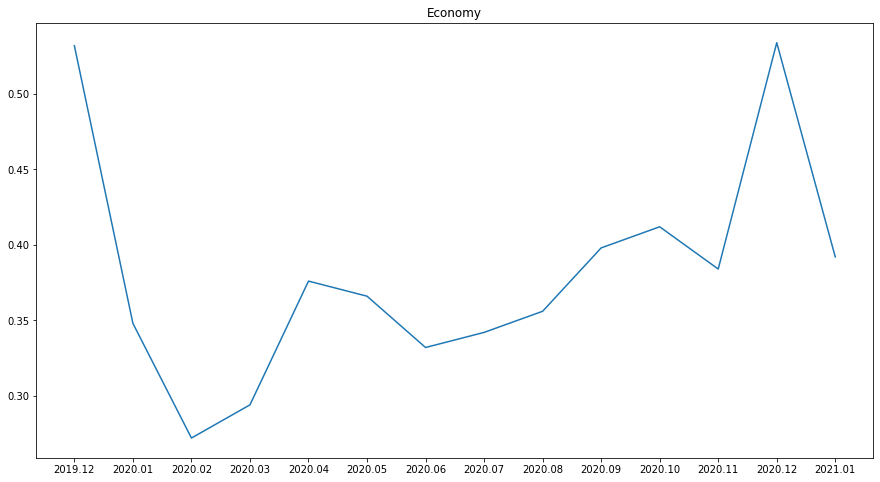

In [23]:
eval('Economy')

2019.12 : 0.398
2020.01 : 0.136
2020.02 : 0.152
2020.03 : 0.31
2020.04 : 0.39
2020.05 : 0.368
2020.06 : 0.316
2020.07 : 0.264
2020.08 : 0.286
2020.09 : 0.224
2020.10 : 0.284
2020.11 : 0.354
2020.12 : 0.334
2021.01 : 0.296
-------------Finished-------------


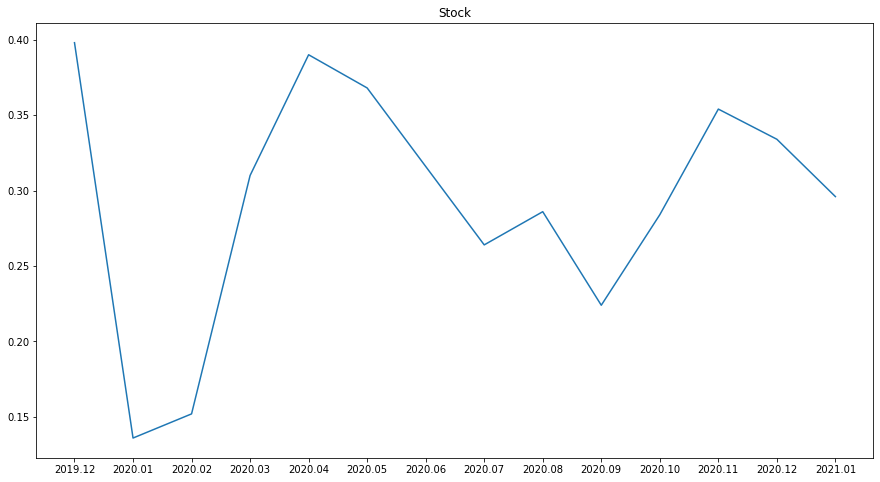

In [24]:
eval('Stock')